# CCS vs Energy for DFT, AMBER, and DFT geometry optimized

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns; sns.set()

from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
from scipy.stats import gaussian_kde
from scipy.stats.stats import pearsonr
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
    


# hartree = 627.509 kcal/mol
names = ['Harmine', '1-Methylguanosine', 'Sphingosine', 'riboflavin', 'Mandelonitrile',
         'Creatinine', 'Methyleugenol', 'N6-methyladenosine', 'Cholic Acid', 'Astilbin',
         'SDGRG', 'Biliverdin', 'Anthranilic acid', 'Aminohippuric acid',
        '3\'-O-methylguanosine', 'Sucrose', 'Naringin', 'PE 16:1/16:1']
key = ['BXNJHAXVSOCGBA-UHFFFAOYSA-N','UTAIYTHAJQNQDW-KQYNXXCUSA-N','WWUZIQQURGPMPG-CCEZHUSRSA-N',
         'AUNGANRZJHBGPY-SCRDCRAPSA-N','NNICRUQPODTGRU-SVGMAFHSNA-N','DDRJAANPRJIHGJ-UHFFFAOYSA-N',
         'ZYEMGPIYFIJGTP-UHFFFAOYSA-N','VQAYFKKCNSOZKM-IOSLPCCCSA-N','BHQCQFFYRZLCQQ-OELDTZBJSA-N',
         'ZROGCCBNZBKLEL-MPRHSVQHSA-N','UVLWLKCNNYTXDT-XDTORHTBNA-N','QBUVFDKTZJNUPP-BBROENKCNA-N',
         'RWZYAGGXGHYGMB-UHFFFAOYSA-N','HSMNQINEKMPTIC-UHFFFAOYSA-N','UYARPHAXAJAZLU-KQYNXXCUSA-N',
         'CZMRCDWAGMRECN-UGDNZRGBSA-N','DFPMSGMNTNDNHN-ZPHOTFPESA-N','PGPMCWZMPPZJML-UHIQGXGONA-N']
molids = ['02', '03', '04', '05', '10', '11', '12', '14', '16', '17', '18', '19', '21', 
          '22', '24', '25', '28', '29']
adducts = ['+H','+H','+H','+H','+H',
           '+Na','+Na','+Na','+Na','+Na','+Na','+Na', 
           '-H', '-H', '-H', '-H', '-H', '-H']
hexs = ['f90000', 'f95200', 'f98800', 'f9ae00', 'f9db00', 'ecf900', '9df900', '00f94a', 
        '00f9c7', '00f4f9', '00b6f9', '007cf9', '0014f9', 'ae00f9', 'f900f9', 'f90091', 
        'a5a5a5', 'e3e3e3']
mass = [212.094963, 297.1073186, 299.2824294, 376.1382844, 133.0527639, 113.0589119,
        178.0993797, 281.112404, 408.2875744, 450.1162115, 490.2135746, 582.2478348,
        137.0476785, 194.0691422, 297.1073186, 342.1162115, 580.1792057, 687.4839047]

In [2]:
def cve(ax, x, y, z, labelsize=20):  

    # Find y axis min and max, used for all subplots
    ymin = y.min()
    ymax = y.max()
    
    plt.scatter(x, y, c=z, s=10, cmap='viridis', label=None)
    plt.ylim(ymin, ymax)
               
    xtic = np.linspace(np.min(x)-0.01, np.max(x)+0.01, 3)
    ytic = np.linspace(np.min(y)-1, np.max(y)+1, 5)
    ax.set_xticks(xtic)
    ax.set_yticks(ytic)
    
    ax.xaxis.set_major_formatter(FormatStrFormatter('%0.0f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))    
    
    plt.tick_params(axis='both', which='major', labelsize=labelsize)

02
03
04
05
10
11
12
14
16
17
18
19
21
22
24
25
28
29


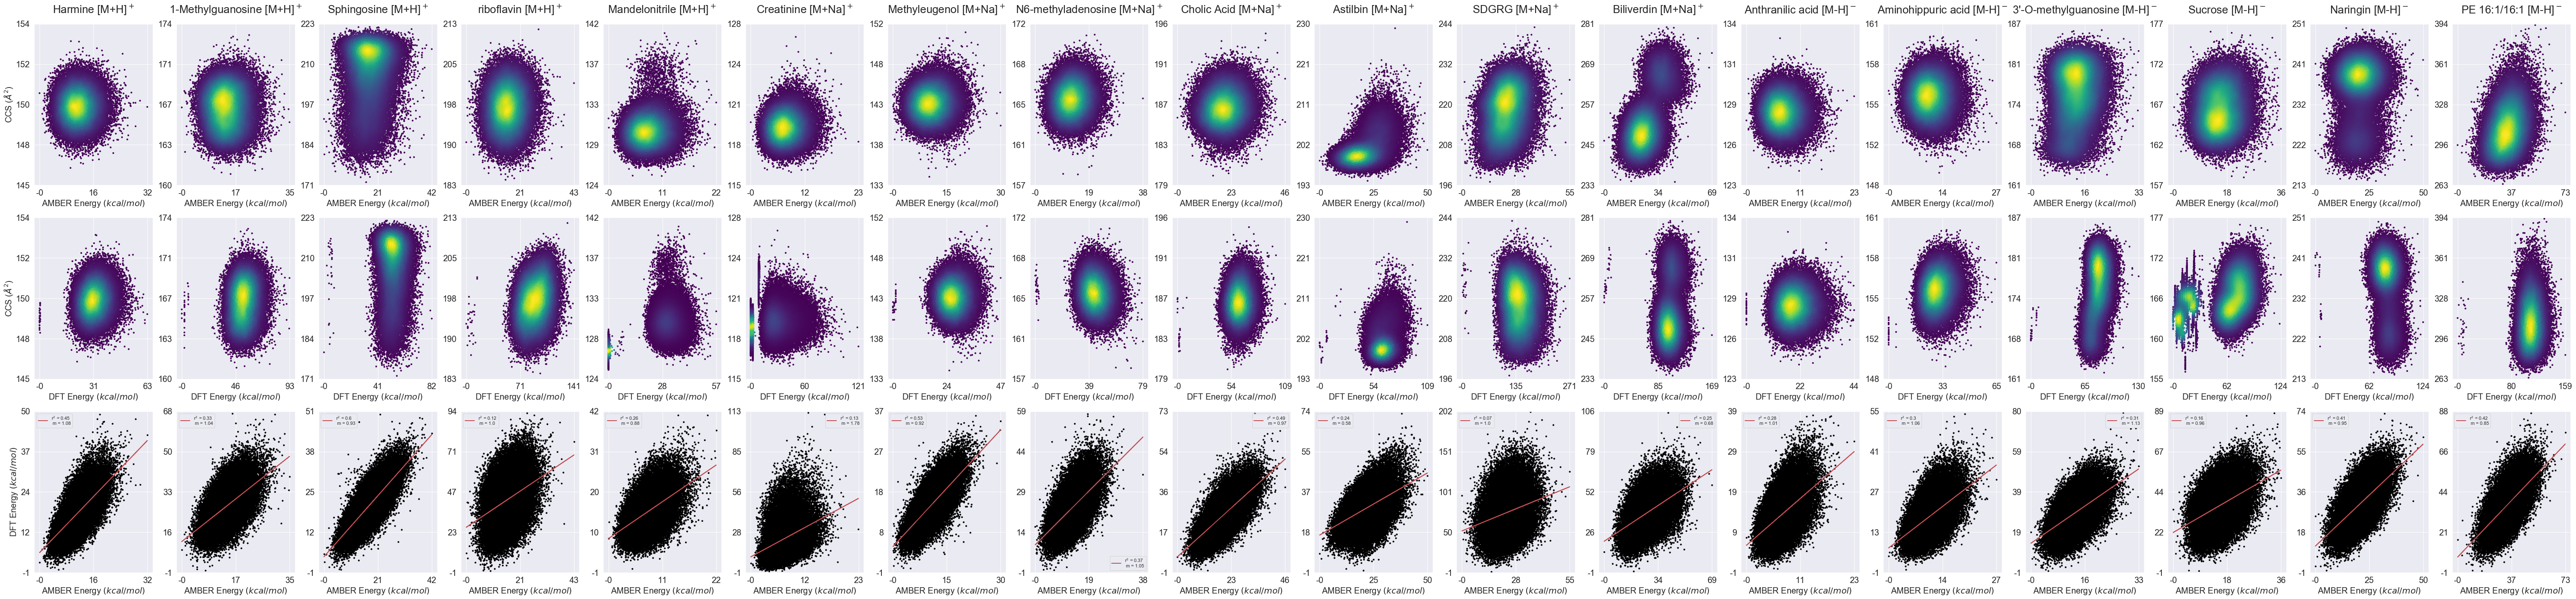

In [3]:
plt.figure(figsize=(6*18,24))
for d, ID in enumerate(molids[:], start=0): #dgo 30, dft-go 50k, dft e, MD ccs vs Energy
    print(ID)
    file1 = f'../data/molid{ID}_ccs.csv' #DFT E
    file2 = f'../data/molid{ID}_dgo_ccs.csv' #DFT GO 50k
    file3 = f'../data/molid{ID}{adducts[d]}_amber_dft_ccs.csv' # AMBER
    file4 = f'../data/dgo_30/multconformer_ccs/molid{ID}_ccs_30dgo.csv' #DFT GO 30
    file5 = f'../data/dgo_30/newbench0.1/{key[d]}_{adducts[d]}.csv'
    file6 = f'../data/dgo_30/newbench0.1.5/{key[d]}_{adducts[d]}.csv'
    
    if os.path.exists(file2):
        DFTGO = pd.read_csv(file2)
    elif os.path.exists(file6):
        DFTGO = pd.read_csv(file6)
    elif os.path.exists(file5):
        print('this was used')
        DFTGO = pd.read_csv(file5)
    else:
        DFTGO = pd.read_csv(file4)
    

    DFTE = pd.read_csv(file1)
    AMBER = pd.read_csv(file3)
    
    
    
    labelsize = 20
    
####------------
    # Plot MD
    ax1 = plt.subplot(3,18,d+1)
    
    mn = AMBER['EPtot'].min()
    AMBER['EPtot'] -= mn
    
    x = AMBER['EPtot']
    y = AMBER['ccs']  
    
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
#    z = 'black'      
    
    cve(ax1, x, y, z, labelsize=labelsize)
    plt.title(f'{names[d]} [M{adducts[d]}]$^{adducts[d][0]}$', fontsize=26, y=1.05)
    plt.xlabel('AMBER Energy $\it{(kcal/mol)}$', fontsize=labelsize)
    if d == 0:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize)
    
####------------
    # Plot DFT E and DFT GO together
    ax2 = plt.subplot(3,18,d+1+18)

    DFT = DFTGO.append(DFTE, sort=True)
    DFT['dft_energy'] *= 627.509
    mn = DFT['dft_energy'].min()
    DFT['dft_energy'] -= mn
    
    x = DFT['dft_energy']
    y = DFT['ccs']  
    
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
#    z = 'black'      
    
    cve(ax2, x, y, z, labelsize=labelsize)
    plt.xlabel('DFT Energy $\it{(kcal/mol)}$', fontsize=labelsize)
    if d == 0:
        plt.ylabel('CCS ($\AA^2$)', fontsize=labelsize)
    
#     DFTGO['dft_energy'] *= 627.509
#     DFTGO['dft_energy'] -= mn
#     x = DFTGO['dft_energy']
#     y = DFTGO['ccs']
#     plt.scatter(x, y, c='b')
    
####------------
    # Plot MD vs DFT Energy correlation (they both have the same ccs)
    ax3 = plt.subplot(3,18,d+1+18*2)
    
    mn = AMBER['EPtot'].min()
    AMBER['EPtot'] -= mn
    
    AMBER['dft_energy'] *= 627.509 # convert hartree/mol to kcal/mol
    mn = AMBER['dft_energy'].min()
    AMBER['dft_energy'] -= mn

    x = AMBER['EPtot']
    y = AMBER['dft_energy']
    
    # Generate color by density
#    xy = np.vstack([x,y])
#    z = gaussian_kde(xy)(xy)
    z = 'black'

    cve(ax3, x, y, z, labelsize=labelsize)
    plt.xlabel('AMBER Energy $\it{(kcal/mol)}$', fontsize=labelsize)
    if d == 0:
        plt.ylabel('DFT Energy $\it{(kcal/mol)}$', fontsize=labelsize)
    
    
    # Plot the Linear regression line
    lr = linregress(x,y)
    m = lr[0]
    r2 = lr[2]**2
    #x_vals = np.array((0, np.max(x)))
    #y_vals = AMBER['dft_energy'][np.argmin(x)] + m * x_vals
    #plt.plot(x_vals, y_vals, color='r', linestyle='-', linewidth=2,
    #         label=f'r$^2$ = {np.round(r2, decimals=2)} \n m = {np.round(m, decimals=2)}')  
    
    x_vals = x.values.reshape(-1, 1)
    y_vals = y.values.reshape(-1, 1)
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(x_vals, y_vals)  # perform linear regression
    y_pred = linear_regressor.predict(x_vals)     
    
    plt.plot(x_vals, y_pred, color='r', linestyle='-', linewidth=2,
             label=f'r$^2$ = {np.round(r2, decimals=2)} \n m = {np.round(m, decimals=2)}')
    
    plt.legend()    
         


#plt.savefig('BIG-300dpi.png', bbox='tight', dpi=300)
plt.show()
    
    